# Aggregating & Describing the Hashtag Data by Unique Users
------
<br>

><p style='font-size: medium; font-style: Garramond;'>After importing the packages we'll use & setting display preferences, we'll take a look at some of the stats surrounding the accounts represented in the dataset. Even though we have a tweet-level dataset, we can aggregate the data by the unique accounts in order to get a sense of how represented some accounts are in relation to others. To help understand this relationship better & inform the creation of the account-type variables to be used in the study, we will also visualize some of these relationships using the pandas and numpy packages for Python.</p>
</br>

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import matplotlib as plt

In [4]:
from pylab import *

In [5]:
%matplotlib inline

In [7]:
plt.rcParams['figure.figsize'] = (20, 10)

In [8]:
import seaborn as sns

In [9]:
df = pd.read_pickle('a_HT_no_retweets.pkl')
print len(df)
df.head()

2187


,id,hash_select,tweet_id,inserted_date,truncated,language,possibly_sensitive,coordinates,retweeted_status,created_at_text,created_at,content,from_user_screen_name,from_user_id,from_user_followers_count,from_user_friends_count,from_user_listed_count,from_user_statuses_count,from_user_description,from_user_location,from_user_created_at,retweet_count,entities_urls,entities_urls_count,entities_hashtags,entities_hashtags_count,entities_mentions,entities_mentions_count,in_reply_to_screen_name,in_reply_to_status_id,source,entities_expanded_urls,json_output,entities_media_count,media_expanded_url,media_url,media_type,video_link,photo_link,twitpic
9,2555,%2523montanamoment,8.550000e+17,35:57.3,0,en,0.0,NaN,NaN,Fri Apr 21 04:21:17 +0000 2017,21:17.0,The night sky is a fascinating place especiall...,LeonKauffman,4.251257e+08,673,152,39,1616,"Hydrologist, photographer, fan of Drexel baske...","Condon, Montana, USA",Wed Nov 30 15:58:25 +0000 2011,4,NaN,0,MontanaMoment,1,NaN,0,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",NaN,"{u'contributors': None, u'truncated': False, u...",1.0,https://twitter.com/LeonKauffman/status/855275...,http://pbs.twimg.com/media/C96LaxcUQAEMOQl.jpg,photo,0,0,0
10,2556,%2523montanamoment,8.550000e+17,35:57.7,0,en,0.0,NaN,NaN,Fri Apr 21 03:15:27 +0000 2017,15:27.0,Nick's view of the #sunset from Sunset Bench i...,ErinWx,1.636606e+08,632,243,47,10327,Chief Meteorologist for CBS affiliate KPAX-TV ...,"Missoula, MT",Wed Jul 07 00:05:20 +0000 2010,0,NaN,0,"sunset, Bitterroot, mtwx, Montana, MontanaMoment",5,NaN,0,NaN,NaN,"<a href=""http://www.socialnewsdesk.com"" rel=""n...",NaN,"{u'contributors': None, u'truncated': False, u...",1.0,https://twitter.com/ErinWx/status/855258652323...,http://pbs.twimg.com/media/C959NaAXcAAuGyH.jpg,photo,0,0,0
11,2557,%2523montanamoment,8.550000e+17,35:58.0,0,en,0.0,NaN,NaN,Fri Apr 21 03:15:25 +0000 2017,15:25.0,Nick's view of the #sunset from Sunset Bench i...,wxmissoula,2.208096e+07,1550,6,55,10450,Stormtracker Weather,"Missoula, MT",Thu Feb 26 23:47:21 +0000 2009,0,NaN,0,"sunset, Bitterroot, mtwx, Montana, MontanaMoment",5,NaN,0,NaN,NaN,"<a href=""http://www.socialnewsdesk.com"" rel=""n...",NaN,"{u'contributors': None, u'truncated': False, u...",1.0,https://twitter.com/wxmissoula/status/85525864...,http://pbs.twimg.com/media/C959M38XoAA1tIY.jpg,photo,0,0,0
22,2568,%2523montanamoment,8.550000e+17,36:00.0,0,en,0.0,NaN,NaN,Thu Apr 20 23:42:12 +0000 2017,42:12.0,"Some more ""wallpaper"" from our family's homest...",lastbestbox,8.190000e+17,186,741,4,284,Now Open! A new Montana based subscription box...,"Missoula, MT",Wed Jan 11 21:01:50 +0000 2017,0,https://t.co/QeMPO1wuW8,1,"montanamoment, lastbestbox, montana, montanahi...",4,NaN,0,NaN,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",http://fb.me/7qwPMbA3m,"{u'contributors': None, u'truncated': False, u...",NaN,NaN,NaN,NaN,0,0,0
24,2570,%2523montanamoment,8.550000e+17,36:00.0,0,en,0.0,NaN,NaN,Thu Apr 20 23:26:55 +0000 2017,26:55.0,Spotted 2 moose in the Big Sky meadow! @explor...,ShannonAMay,7.018525e+07,1128,766,80,11938,Freelance Marketing Consultant. Iced Coffee Dr...,"Big Sky, Montana",Sun Aug 30 18:51:26 +0000 2009,0,NaN,0,MontanaMoment,1,explorebigsky,1,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,"{u'contributors': None, u'truncated': False, u...",1.0,https://twitter.com/ShannonAMay/status/8552011...,http://pbs.twimg.com/media/C95IpAEUwAE_5ge.jpg,photo,0,0,0


In [10]:
len(df)

2187

In [11]:
# a function to apply to the df aggregation below. This counts the # of tweets from each user.
def f(x):
    return Series(dict(num_tweets = x['content'].count(),
                       ))

In [12]:
# aggregate the df to the user-level to count num of tweets by user
user_data = df.groupby('from_user_screen_name').apply(f)
print len(user_data)

546


In [13]:
# user_data aggregated properly. It's length is equal to the # of unique user names (3100)
len(pd.unique(df.from_user_screen_name.ravel())) == len(user_data)

True

In [14]:
# the output looks good, let's dig deeper
user_data.head()

,num_tweets
from_user_screen_name,
1Blonde_Amy,8
22Lupfer,18
3footedcat,3
406DMF,1
406Productions_,1


In [15]:
# this shows the how many unique values the num_tweets variable has. It is likely, for example, that many of the 546 users 
# have only one case in the dataset.
len(pd.unique(user_data.num_tweets.ravel()))

30

In [16]:
# the highest # tweets from single user = 318
user_data.max()

num_tweets    318
dtype: int64

In [17]:
# as displayed in chart above, min value = 1 tweet sent (which makes sense; otherwise, they wouldn't be in the dataset)
user_data.min()

num_tweets    1
dtype: int64

In [19]:
# check that total num of tweets in user_data correctly matches the total in the orginal df (i.e., none were dropped)
len(df) == user_data.num_tweets.sum()

True

In [20]:
# this means we can take the average tweet by dividing all tweets by users

avg = str(round(len(df)/float(len(user_data)), 2))
print "range of number of tweets: 1 to 318"
print "average number of tweets: " + avg

range of number of tweets: 1 to 318
average number of tweets: 4.01


In [33]:
# looks like the data has some outliers

user_data.to_csv('HT_num_tweets_by_userNRETWEETS.csv')

<br>
## Identifiying users by number of cases in the dataset
------
><p style='font-size: large'>To determine how to best categorize the account-types, it will be important to estimate the spreadness of the data. To start, we'll see if any users are overrepresented in the dataset by sorting the dataset by the number of tweets (cases) each tweet has in the dataset</p>
<br>

In [22]:
# sort user-level df by # of tweets
user_data = user_data.sort_values(by='num_tweets', ascending=False)

In [23]:
# the top tweeter (Exception Mag) is a Portland based media company apparently unrelated
# the official mt destination marketing org is 2nd
# 3rd is Leon Kauffman, a freelance photographer based in MT - 

user_data

,num_tweets
from_user_screen_name,
TheExceptionMag,318
visitmontana,108
LeonKauffman,101
montanalori,77
Improve_HomesMT,73
WildReflections,47
RadleyIce,32
KLeaguePhoto,30
ShannonAMay,27


In [24]:
len(df)

2187

In [25]:
# it appears use of the 'montanaMoment' hashtag is distributed across many users, rather than a select few.

print "The top 5 users tweeted " + str(round((318 + 108 + 103 +  101 + 90) / float(len(df)) * 100, 1)) + "% of the tweets."

The top 5 users tweeted 32.9% of the tweets.


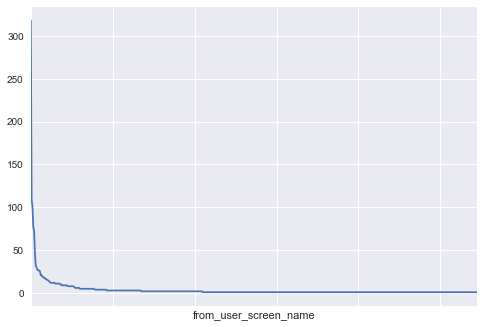

In [26]:
# let's put the tweet data to a graph
# One of the interesting questions is who is driving the traffic of tweets (to be analyzed later). First, let's get a 
# closer look at the top segment
user_data['num_tweets'].plot()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
# savefig('graph_HT_users_tweets_all.png', bbox_inches='tight', dpi=300, format='png')

In [27]:

print("The number of unique users who have tweeted 'montanamoment' is " + str(len(user_data)))
print("Of those users, " + str((len(user_data[user_data['num_tweets'] == 1]))) + " have only tweeted once")
print("That leaves " + str((len(user_data) - (len(user_data[user_data['num_tweets'] == 1])))) +" who have tweeted more than once")

The number of unique users who have tweeted 'montanamoment' is 546
Of those users, 336 have only tweeted once
That leaves 210 who have tweeted more than once


In [28]:
print("The number of unique users who have tweeted 'montanamoment' is " + str(len(user_data)))
print("Of those users, " + str((len(user_data[user_data['num_tweets'] < 5]))) + " have tweeted 'montanaMoment' less than 5 times")
print("Lets graph the " + str((len(user_data) - (len(user_data[user_data['num_tweets'] <= 5])))) +" who have tweeted more than 5 times")

The number of unique users who have tweeted 'montanamoment' is 546
Of those users, 468 have tweeted 'montanaMoment' less than 5 times
Lets graph the 60 who have tweeted more than 5 times


In [29]:
# math check
len(user_data[user_data['num_tweets'] > 5])

60

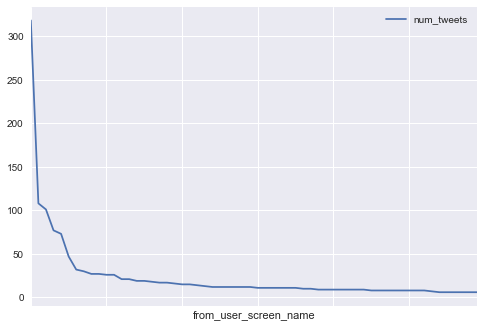

In [30]:
user_data[user_data['num_tweets'] > 5].plot()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
savefig('graph_HT_users_tweets_5&above.png', bbox_inches='tight', dpi=300, format='png')

In [31]:
##################   It looks like the bulk of these 5+ tweeters have tweeted less than 100 times, we 
## see only 4 people have tweeted more than 100 times.
user_data.head(5)

,num_tweets
from_user_screen_name,
TheExceptionMag,318
visitmontana,108
LeonKauffman,101
montanalori,77
Improve_HomesMT,73


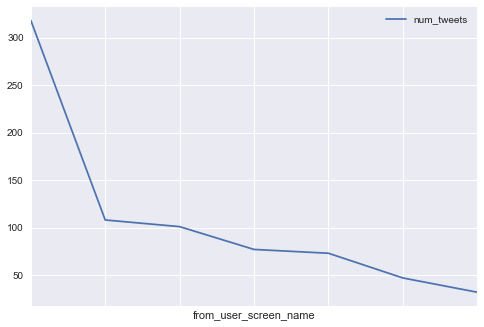

In [32]:
## This is clearer when we graph only those users who have tweeted 'montanaMoment more than 30 times

user_data[user_data['num_tweets'] > 30].plot()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
# savefig('graph_HT_users_tweets_30&above.png', bbox_inches='tight', dpi=300, format='png')